### For Pretty Plotting

In [2]:
import shutil
import matplotlib.pyplot as plt

# Check if LaTeX is installed
def is_latex_installed():
    return shutil.which("latex") is not None

# Define matplotlib settings
latex_installed = is_latex_installed()

plt.rcParams.update({
    'text.usetex': latex_installed,
    'font.family': 'serif' if latex_installed else 'sans-serif',
    'font.serif': ['Computer Modern Roman'] if latex_installed else [],
    'font.sans-serif': ['DejaVu Sans'] if not latex_installed else [],
    'mathtext.fontset': 'cm' if latex_installed else 'dejavusans',
    'text.latex.preamble' : r'\usepackage{{amsmath}}',

    # Set label and title font sizes & weight
    'axes.labelsize': 12,
    'axes.titlesize': 14,

    # Improve tick readability
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'xtick.direction': 'in',
    'ytick.direction': 'in',

    # Adjust tick size for better visibility
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,

    # Enable minor ticks for better granularity
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,

    # Set grid style for scientific appearance
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'grid.linewidth': 0.5,

    # Adjust figure and axis line widths for better contrast
    'axes.linewidth': 1.2,
    'grid.linewidth': 0.5,

    # Increase legend readability
    'legend.fontsize': 10,
    'legend.frameon': True,
    'legend.loc': 'best',

    # Adjust figure and subplot sizes for better aspect ratio
    'figure.figsize': (6, 4),
    'figure.dpi': 300,

    # Save figures with high resolution
    'savefig.dpi': 300,
    'savefig.format': 'eps',
    'savefig.bbox': 'tight',

    # Default line width for plots
    'lines.linewidth': 0.8,  # Set default line width

    # Apply tight layout automatically
    'figure.autolayout': True
    
})

# Print status message
if latex_installed:
    print("LaTeX is installed. Using Computer Modern Roman with usetex.")
else:
    print("LaTeX not found. Using DejaVu Sans without usetex.")


# custom_palette = {
#     "blue": "#1f78b4",
#     "green": "#33a02c",
#     "pink": "#fb9a99",
#     "red": "#e31a1c",
#     "orange": "#ff7f00",
#     "purple": "#6a3d9a",
#     "yellow": "#ffff99",
#     "brown": "#b15928",
#     "grey": "#6D6875",
# }


LaTeX is installed. Using Computer Modern Roman with usetex.


# Data and EDA

In [11]:
import pandas as pd
import numpy as np
import os
import sys


sec_df = pd.read_csv("./data/securities.csv")
print(sec_df.columns)
print(f"Number of securities: {sec_df['GVKEY'].nunique()}")
print(f"Time period: {sec_df['year_month'].min()} to {sec_df['year_month'].max()}")
print(f"Number of observations: {sec_df.shape[0]}")
sec_df.head()

Index(['GVKEY', 'year_month', 'trt1m', 'divyield', 'bm', 'pe_exi', 'pe_inc',
       'evm', 'de_ratio', 'debt_capital', 'ps', 'ptb', 'roe', 'roa', 'roce',
       'gpm', 'npm', 'opmad', 'opmbd', 'rd_sale', 'adv_sale', 'staff_sale',
       'dltt_be', 'debt_assets', 'debt_ebitda', 'intcov', 'intcov_ratio',
       'ocf_lct', 'cash_debt', 'at_turn', 'inv_turn', 'rect_turn', 'pay_turn',
       'curr_ratio', 'quick_ratio', 'cash_ratio', 'cshoq', 'cshom', 'prccm',
       'cshtrm', 'gsector'],
      dtype='object')
Number of securities: 127
Time period: 2001-01 to 2023-12
Number of observations: 36443


,GVKEY,year_month,trt1m,divyield,bm,pe_exi,pe_inc,evm,de_ratio,debt_capital,...,rect_turn,pay_turn,curr_ratio,quick_ratio,cash_ratio,cshoq,cshom,prccm,cshtrm,gsector
0,1078,2001-01,-6.9935,1.69%,0.113,25.931,25.931,15.618,0.867,0.289,...,5.431,4.163,1.545,1.171,0.197,1548.255,1.545620e+09,44.86,94326500.0,35.0
1,1078,2001-02,9.2064,1.55%,0.114,27.522,27.522,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255,1.546586e+09,48.99,58953200.0,35.0
2,1078,2001-03,-3.6742,1.61%,0.114,26.511,26.511,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1548.255,1.546586e+09,47.19,72272600.0,35.0
3,1078,2001-04,-1.2715,1.81%,0.114,26.056,26.056,18.691,0.783,0.254,...,5.306,4.381,1.716,1.311,0.269,1549.139,1.546586e+09,46.38,65910800.0,35.0
4,1078,2001-05,12.0742,1.62%,0.111,43.317,43.317,18.033,1.026,0.345,...,5.180,4.407,1.244,0.932,0.163,1550.023,1.548857e+09,51.98,85142700.0,35.0


,gvkey,conm,gsector,Sector
0,1078,ABBOTT LABORATORIES,35.0,Health Care
1,1209,AIR PRODUCTS & CHEMICALS INC,15.0,Materials
2,1300,HONEYWELL INTERNATIONAL INC,20.0,Industrials
3,1380,HESS CORP,10.0,Energy
4,1598,AMETEK INC,20.0,Industrials


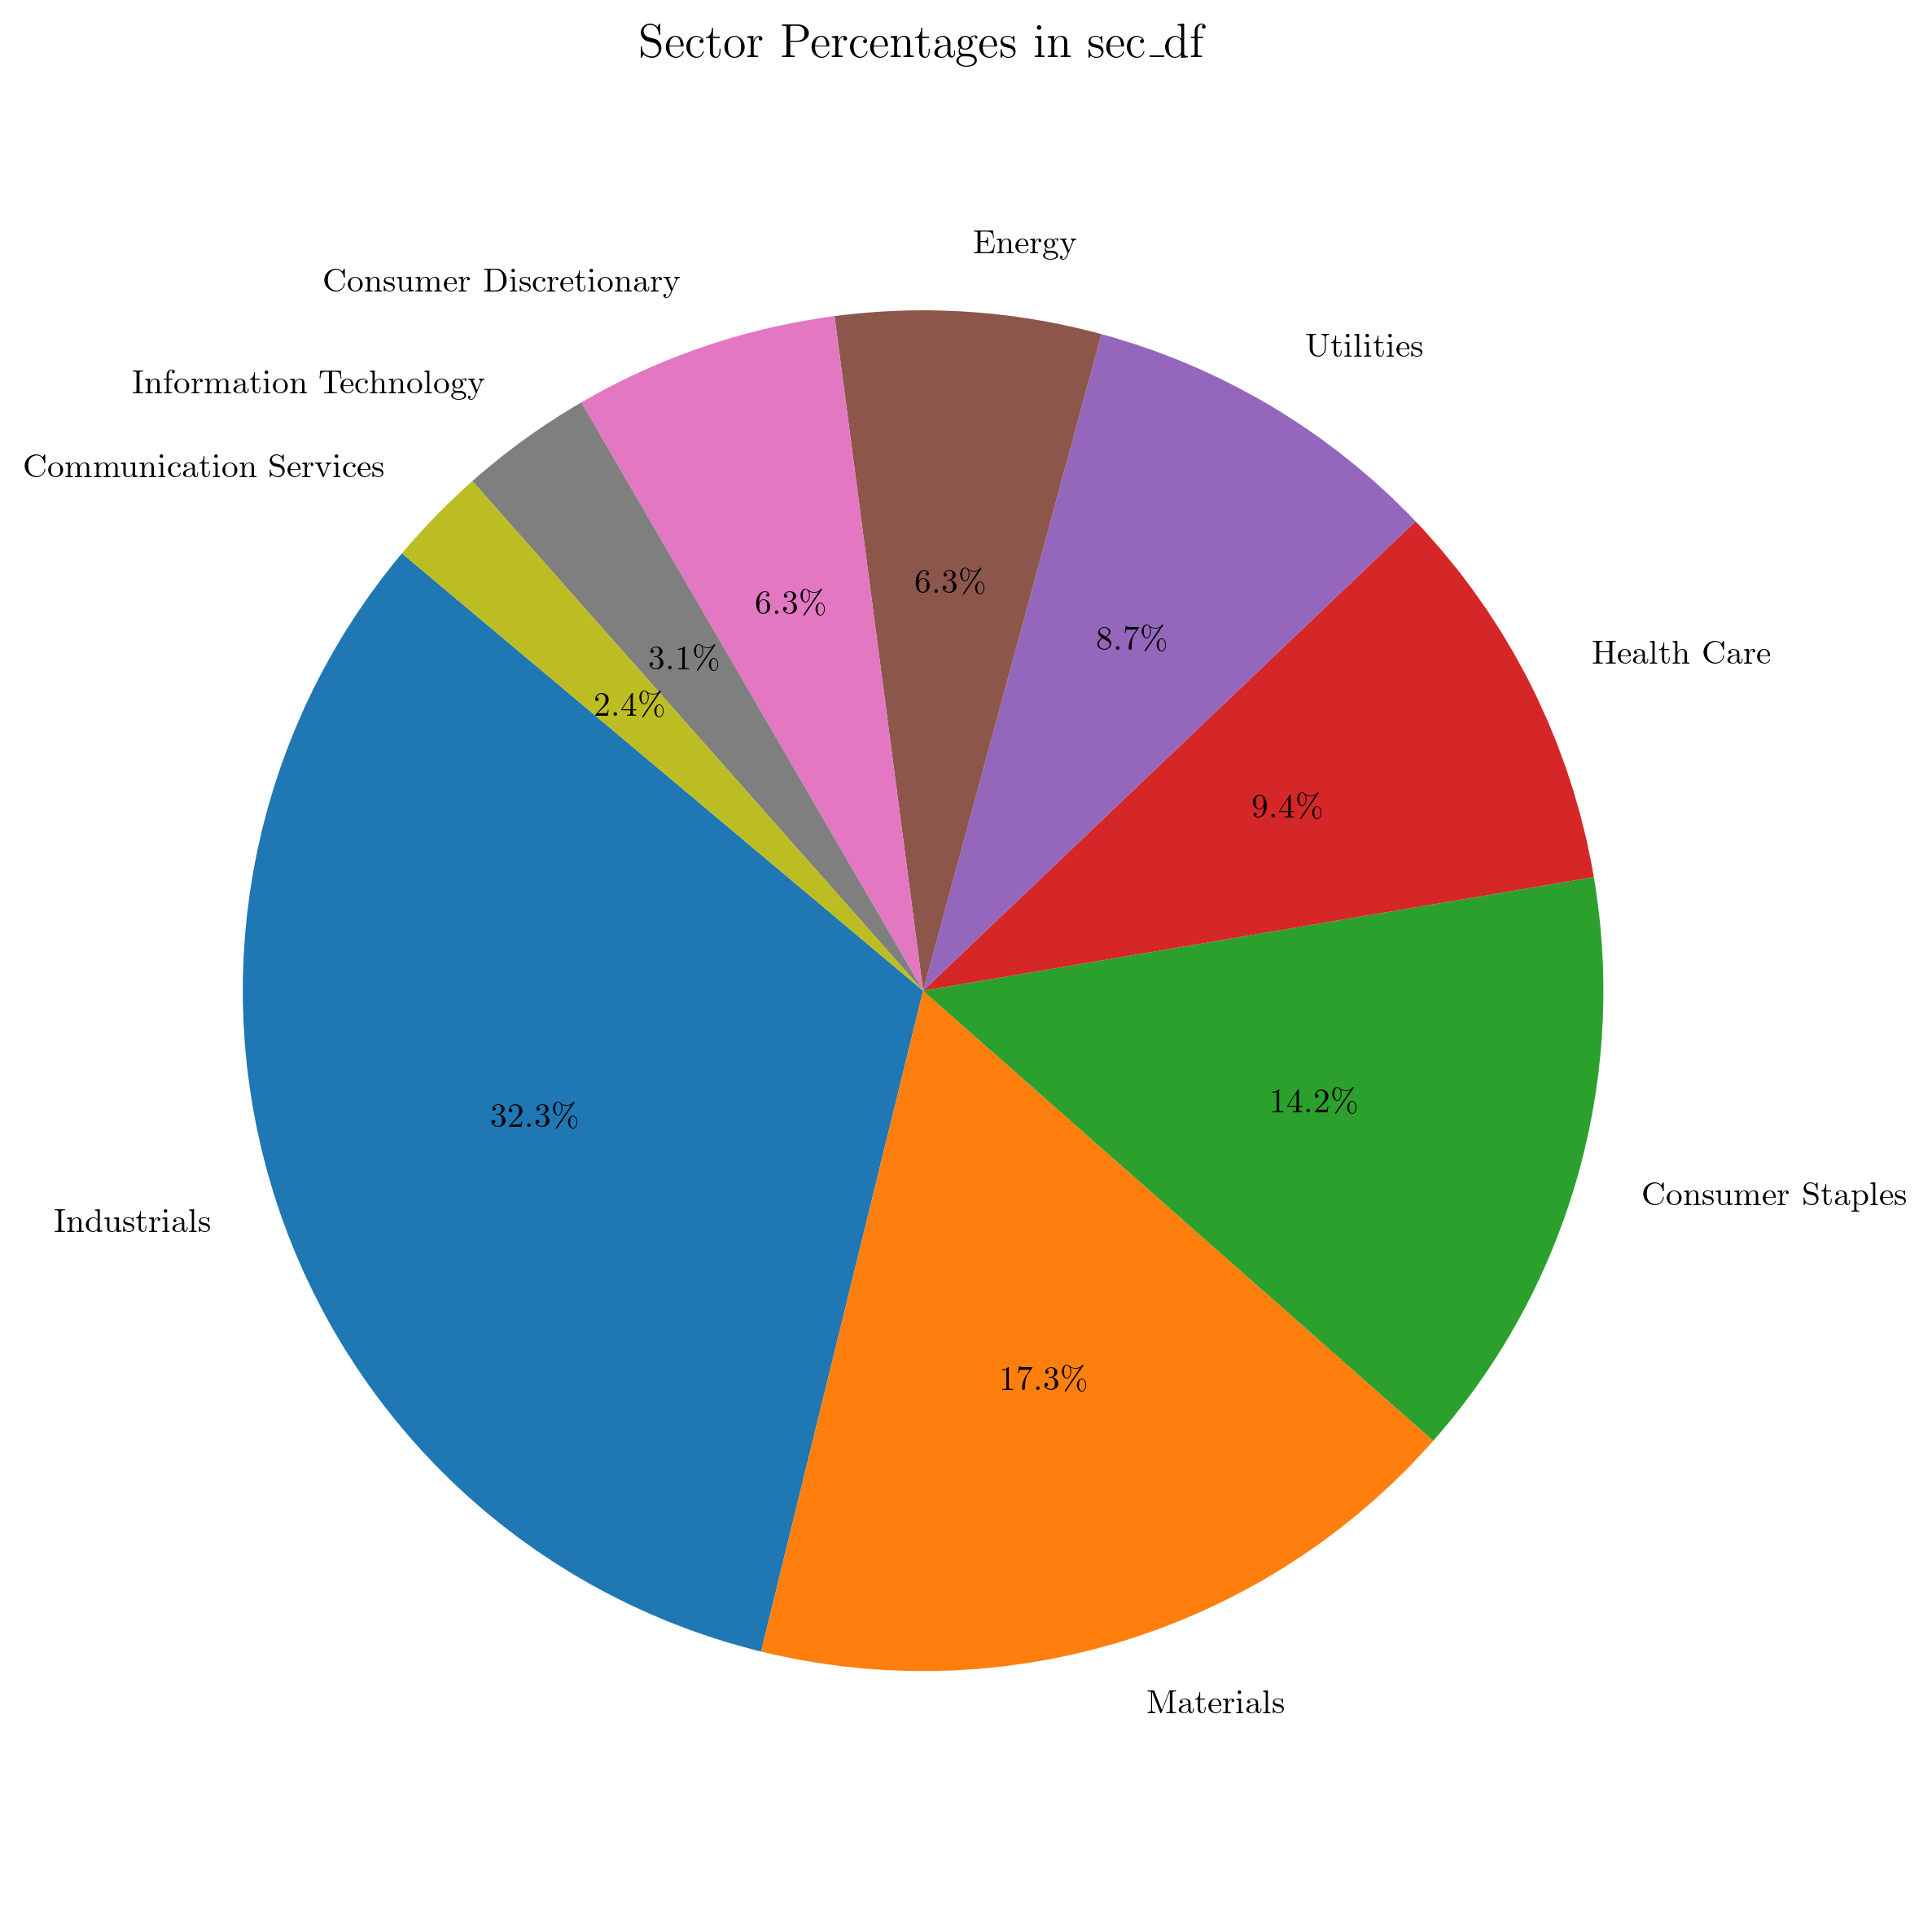

,gsector,Sector
0,10.0,Energy
1,15.0,Materials
2,20.0,Industrials
3,25.0,Consumer Discretionary
4,30.0,Consumer Staples
5,35.0,Health Care
6,45.0,Information Technology
7,50.0,Communication Services
8,55.0,Utilities


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract unique gvkeys from sec_df
unique_keys = pd.DataFrame(sec_df['GVKEY'].unique(), columns=['gvkey'])

# Read the lookup CSV to get company names and merge with unique gvkeys
lookup = pd.read_csv('./data/lookup.csv')
unique_lookup = lookup.drop_duplicates(subset=['gvkey'])
merged = pd.merge(unique_keys, unique_lookup[['gvkey', 'conm']], on='gvkey', how='left')

# Extract gsector for each company from sec_df (assuming one unique sector per GVKEY)
gvkey_sector = sec_df.groupby('GVKEY')['gsector'].first().reset_index()
merged = pd.merge(merged, gvkey_sector, left_on='gvkey', right_on='GVKEY', how='left')
merged = merged[['gvkey', 'conm', 'gsector']]

# Read the GIC CSV to extract unique sector code and full sector name
gic_lookup = pd.read_csv('./data/gic.csv')[['Sector Code', 'Sector']].drop_duplicates()
gic_lookup.rename(columns={'Sector Code': 'gsector'}, inplace=True)
gic_lookup['gsector'] = gic_lookup['gsector'].astype(merged['gsector'].dtype)

# Merge the GIC lookup to add the full sector names to merged
merged = pd.merge(merged, gic_lookup, on='gsector', how='left')

# Display the merged DataFrame with company names and full sector names
display(merged.head())

# Plot a pie chart of the sector percentages using the full sector names
sector_counts = merged['Sector'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Sector Percentages in sec_df")
plt.axis('equal')
plt.show()

# Extract unique mapping from gsector code to full sector name
unique_sector_lookup = merged[['gsector', 'Sector']].drop_duplicates().sort_values(by='gsector')
display(unique_sector_lookup.reset_index(drop=True))

In [5]:
import pandas as pd
import os
import warnings

# Silence FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Choose your resampling method for daily data:
# 'mean' for monthly average, 'first' for first available day.
resample_method = 'mean'  

# Paths (adjust if your files are elsewhere)
DATA_DIR = './data'
macro_files = {
    "AAA10Y": "AAA10Y.csv",
    "BAA10Y": "BAA10Y.csv",
    "CPI": "cpi.csv",
    "GS10": "GS10.csv",
    "IR_10Y_GOV": "ir-10-year-gov-bonds.csv",
    "T10Y3M": "T10Y3M.csv",
    "Unemployment": "unemployment.csv",
    "WorkingAgePop": "working-age-pop.csv"
}

# Dictionary to store processed macro DataFrames
macro_dfs = {}

for name, filename in macro_files.items():
    path = os.path.join(DATA_DIR, filename)
    df = pd.read_csv(path)
    
    # Force renaming: first column -> 'DATE', second column -> variable name.
    new_cols = ['DATE', name] + list(df.columns[2:])
    df.columns = new_cols
    
    # Convert DATE to datetime and drop rows with bad dates.
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    df = df.dropna(subset=['DATE'])
    
    # Set DATE as index and sort.
    df = df.set_index('DATE').sort_index()
    
    # Check if data is monthly: if every date has day==1, assume it's monthly.
    if (df.index.day == 1).all():
        # Data is monthly; ensure index is standardized to month start.
        df.index = df.index.to_period('M').to_timestamp()
    else:
        # Data is daily (or irregular). Force a daily frequency and fill missing days.
        df = df.asfreq('D')
        df = df.fillna(method='ffill')
        # Resample to monthly using the chosen method.
        if resample_method == 'mean':
            df = df.resample('M').mean()
        elif resample_method == 'first':
            df = df.resample('M').first()
        else:
            raise ValueError("Unknown resample_method: choose 'mean' or 'first'")
        # Convert index to month start.
        df.index = df.index.to_period('M').to_timestamp()
    
    # Keep only the column for this variable.
    macro_dfs[name] = df[[name]]
    
    # Debug output: print index range and count for this series.
    print(f"{name} index range: {df.index.min()} to {df.index.max()}, count: {len(df.index)}")

# Merge all macro series horizontally using pd.concat along columns.
macro_df = pd.concat(list(macro_dfs.values()), axis=1)
macro_df = macro_df.sort_index()
print("\nAfter merging macro data:")
print("macro_df shape:", macro_df.shape)
print("Unique dates in macro_df:", macro_df.index.nunique())

# --- Process Securities (Asset Returns) Data ---
sec_path = os.path.join(DATA_DIR, 'securities.csv')
sec_df = pd.read_csv(sec_path)

# Parse 'year_month' and drop bad rows.
sec_df['year_month'] = pd.to_datetime(sec_df['year_month'], errors='coerce')
sec_df = sec_df.dropna(subset=['year_month'])

# Keep only GVKEY, year_month, and trt1m (return).
sec_df = sec_df[['GVKEY', 'year_month', 'trt1m']]

# For duplicate (GVKEY, year_month) pairs, average the returns.
sec_df = sec_df.groupby(['GVKEY', 'year_month'])['trt1m'].mean().reset_index()

# Pivot to create asset returns matrix: rows = month, columns = GVKEY.
sec_ret = sec_df.pivot(index='year_month', columns='GVKEY', values='trt1m')
# Convert index to monthly frequency (forcing month start).
sec_ret.index = sec_ret.index.to_period('M').to_timestamp()
sec_ret = sec_ret.sort_index()

print("\nSecurities returns:")
print("sec_ret shape:", sec_ret.shape)
print("Unique dates in sec_ret:", sec_ret.index.nunique())

# --- Merge Macro Data and Securities Data ---
combined_df = pd.merge(macro_df, sec_ret, left_index=True, right_index=True, how='inner')
print("\nCombined DataFrame:")
print("combined_df shape:", combined_df.shape)
print("Unique dates in combined_df:", combined_df.index.nunique())


combined_df


AAA10Y index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
BAA10Y index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
CPI index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
GS10 index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
IR_10Y_GOV index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
T10Y3M index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
Unemployment index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276
WorkingAgePop index range: 2001-01-01 00:00:00 to 2023-12-01 00:00:00, count: 276

After merging macro data:
macro_df shape: (276, 8)
Unique dates in macro_df: 276

Securities returns:
sec_ret shape: (276, 127)
Unique dates in sec_ret: 276

Combined DataFrame:
combined_df shape: (276, 135)
Unique dates in combined_df: 276


,AAA10Y,BAA10Y,CPI,GS10,IR_10Y_GOV,T10Y3M,Unemployment,WorkingAgePop,1078,1209,...,23978,25870,28176,28940,29217,29392,29830,30477,61811,66290
DATE,,,,,,,,,,,,,,,,,,,,,
2001-01-01,1.993000,2.773333,0.632184,5.16,5.16,-0.103000,0.042,180346200,-6.9935,-7.8780,...,-13.1111,2.6106,1.8553,8.8079,-0.4808,-4.1846,13.4790,-1.6238,6.7961,7.7477
2001-02-01,2.005357,2.775357,0.399772,5.10,5.10,0.093929,0.042,180507000,9.2064,7.3603,...,-0.9591,7.7822,-3.9104,-10.6121,1.3527,10.1477,-6.8128,0.4032,5.4545,-4.6823
2001-03-01,2.091935,2.956452,0.227531,4.89,4.89,0.339032,0.043,180599100,-3.6742,-4.8335,...,-3.6089,-7.4980,6.1672,-18.5575,-0.4785,-3.4791,2.6958,5.1205,-3.8414,-14.3158
2001-04-01,2.055667,2.924333,0.397276,5.14,5.14,1.184333,0.044,180853100,-1.2715,11.9531,...,25.3233,9.7282,3.8070,17.7556,8.3077,8.1674,47.5000,3.2741,1.4493,2.3967
2001-05-01,1.892581,2.676129,0.452233,5.39,5.39,1.700645,0.043,181010700,12.0742,8.7927,...,6.5725,5.4107,4.3699,7.2850,-0.2131,-5.0714,-6.9915,3.7937,-0.3000,8.2324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.786774,1.850968,0.436716,4.17,4.17,-1.388387,0.037,208840100,-7.5721,-3.2227,...,22.1176,-0.3260,9.1388,-2.8353,-8.3126,-0.6660,-0.9162,-7.6035,-6.6102,5.8343
2023-09-01,0.746000,1.779333,0.248513,4.38,4.38,-1.194000,0.038,209000200,-5.8795,-3.4993,...,4.4709,-10.3764,-5.6729,2.8754,-16.1145,-8.8225,9.4467,-7.7525,-6.6576,23.1533
2023-10-01,0.820968,1.836129,-0.038338,4.80,4.80,-0.813871,0.039,209038200,-1.8482,-0.3387,...,4.3411,-1.0957,-1.8874,-26.5665,-18.4560,-2.5938,0.3631,-8.9180,-5.8308,-1.4324


In [6]:
print(combined_df.columns)
print(f"Time period: {combined_df.index.min()} to {combined_df.index.max()}")
#  - combined_df.iloc[:, :8] => macro data
#  - combined_df.iloc[:, 8:] => asset returns

Index([       'AAA10Y',        'BAA10Y',           'CPI',          'GS10',
          'IR_10Y_GOV',        'T10Y3M',  'Unemployment', 'WorkingAgePop',
                  1078,            1209,
       ...
                 23978,           25870,           28176,           28940,
                 29217,           29392,           29830,           30477,
                 61811,           66290],
      dtype='object', length=135)
Time period: 2001-01-01 00:00:00 to 2023-12-01 00:00:00


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import networkx as nx
from joblib import Parallel, delayed


def extract_B_block(A_full, num_assets, num_macro):
    """
    Extract the cross-edge block B_{am} from the full adjacency matrix.
    A_full is (num_assets+num_macro)x(num_assets+num_macro).
    The layout:
         [ A_aa     B_am ]
         [ B_ma     A_mm ]
    Returns B_am of shape (num_assets, num_macro).
    """
    B_am = A_full[:num_assets, num_assets:]
    return B_am


def extract_B_block(A_full, num_assets, num_macro):
    """
    Extract the cross-edge block B_{am} from the full adjacency matrix.
    A_full is (num_assets+num_macro)x(num_assets+num_macro).
    The layout:
         [ A_aa     B_am ]
         [ B_ma     A_mm ]
    Returns B_am of shape (num_assets, num_macro).
    """
    B_am = A_full[:num_assets, num_assets:]
    return B_am


def compute_directional_accuracy(y_pred, y_true):
    """
    Compute directional accuracy across all stocks.
    Directional accuracy is the fraction of predictions that correctly forecast the sign of the return.
    """
    correct = np.sign(y_pred) == np.sign(y_true)
    accuracy = np.mean(correct)
    return accuracy


class GraphFactorModel:
    def __init__(self, combined_df, A_kg=None, gamma=0.1, filter_type="low"):
        """
        Parameters:
          combined_df: DataFrame with monthly data.
                       The first 8 columns are macro indicators,
                       and the remaining columns are asset returns.
          A_kg: Optional knowledge graph of size (N+M)x(N+M). The first NxN values (top left block)
                and last MxM values (bottom left block) must be zero.
                The top-right block, B_am (NxM), represents the PM's views.
                If None, the cross-connection matrix will be set to zero.
          gamma: Parameter for the exponential spectral filter.
          filter_type: 'low' for low-pass (default) or 'high' for high-pass filtering.
        """
        self.num_macro = 8
        self.num_assets = combined_df.shape[1] - self.num_macro
        self.A_kg = A_kg
        self.gamma = gamma
        if A_kg is not None:
            self.b_am = self.extract_B_block(A_kg, self.num_assets, self.num_macro)
        else:
            self.b_am = None

        # Assert filter_type is valid.
        assert filter_type in ("low", "high"), "filter_type must be 'low' or 'high'"
        self.filter_type = filter_type

        # Assume the first 8 columns are macro variables and the rest are asset returns.
        self.macro_cols = combined_df.columns[: self.num_macro]
        self.asset_cols = combined_df.columns[self.num_macro :]
        # Copy and normalise macro data.
        self.combined_df = combined_df.copy()
        self.normalize_macro_data()
        # Build graph-related matrices on the full dataset (for plotting).
        self.build_graph()
        # Compute global filtering on full data (for plotting only).
        self.filter_signal()

    @staticmethod
    def extract_B_block(A_full, num_assets, num_macro):
        """
        Extract the cross-edge block B_{am} from the full adjacency matrix.
        Returns B_am of shape (num_assets, num_macro).
        """
        return A_full[:num_assets, num_assets:]

    def normalize_macro_data(self):
        """
        Normalise macro data so that all series are on a comparable scale.
        For example, multiply CPI and Unemployment by 100 and robust-scale WorkingAgePop.
        """
        for col in self.macro_cols:
            if col in ["CPI", "Unemployment"]:
                self.combined_df[col] = self.combined_df[col] * 100.0
            elif col == "WorkingAgePop":
                scaler = RobustScaler()
                self.combined_df[col] = scaler.fit_transform(self.combined_df[[col]])

    def build_graph(self):
        """
        Build the block adjacency matrix and compute the Laplacian eigen-decomposition
        using the full dataset.
        Ordering: [asset returns; macro indicators]
        """
        X_asset = self.combined_df[self.asset_cols].values  # shape: (T, N)
        X_macro = self.combined_df[self.macro_cols].values  # shape: (T, 8)
        self.T = self.combined_df.shape[0]
        self.N = X_asset.shape[1]
        self.M = X_macro.shape[1]

        # Compute sample correlation matrices.
        A_aa = np.corrcoef(X_asset, rowvar=False)
        A_aa = np.maximum(A_aa, 0)
        A_mm = np.corrcoef(X_macro, rowvar=False)
        A_mm = np.maximum(A_mm, 0)

        # For cross connections, use self.b_am if provided; otherwise, zeros.
        if self.b_am is None:
            B = np.zeros((self.N, self.M))
        else:
            B = self.b_am

        self.A_full = np.block([[A_aa, B], [B.T, A_mm]])
        D = np.diag(self.A_full.sum(axis=1))
        self.L = D - self.A_full
        eigenvals, U = eigh(self.L)
        self.eigenvals = eigenvals
        self.U = U

        self.X_asset = X_asset
        self.X_macro = X_macro
        self.X_combined = np.hstack([X_asset, X_macro])

    def filter_signal(self):
        """
        Vectorised graph filtering on the full dataset (for plotting).
        Computes X_hat = X_combined @ U, applies the filter h elementwise,
        and computes the inverse transform.
        """
        if self.filter_type == "low":
            h = np.exp(-self.gamma * self.eigenvals)
        else:
            h = 1 - np.exp(-self.gamma * self.eigenvals)
        self.h = h
        # Vectorised Graph Fourier Transform:
        X_hat = self.X_combined @ self.U  # shape: (T, N+M)
        X_hat_filtered = X_hat * h  # elementwise multiply by h (broadcast over rows)
        X_filtered = X_hat_filtered @ self.U.T  # inverse transform
        self.X_filtered = X_filtered
        self.R_filtered = X_filtered[:, : self.N]

    def filter_window_range(self, df_window, return_transform=False):
        """
        Vectorised filtering for a specific window (df_window) using only its data (to prevent lookahead bias).
        Returns the filtered asset returns for that window.

        If return_transform is True, also return the eigenvectors U and filter coefficients h
        computed on the window.
        """
        X_asset = df_window[self.asset_cols].values
        X_macro = df_window[self.macro_cols].values
        A_aa = np.corrcoef(X_asset, rowvar=False)
        A_aa = np.maximum(A_aa, 0)
        A_mm = np.corrcoef(X_macro, rowvar=False)
        A_mm = np.maximum(A_mm, 0)
        B = (
            self.b_am
            if self.b_am is not None
            else np.zeros((self.num_assets, self.num_macro))
        )
        A_full = np.block([[A_aa, B], [B.T, A_mm]])
        D = np.diag(A_full.sum(axis=1))
        L = D - A_full
        eigenvals, U = eigh(L)
        if self.filter_type == "low":
            h = np.exp(-self.gamma * eigenvals)
        else:
            h = 1 - np.exp(-self.gamma * eigenvals)
        X_combined = np.hstack([X_asset, X_macro])
        # Vectorised filtering:
        X_hat = X_combined @ U
        X_hat_filtered = X_hat * h  # elementwise multiply by h
        X_filtered = X_hat_filtered @ U.T
        R_filtered = X_filtered[:, : self.num_assets]
        if return_transform:
            return R_filtered, U, h
        else:
            return R_filtered

    def plot_covariances(self):
        """
        Plot covariance heatmaps for asset returns before and after filtering,
        computed on the full dataset.
        """
        cov_original = np.cov(self.X_combined[:, : self.N].T)
        cov_filtered = np.cov(self.X_filtered[:, : self.N].T)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im0 = axs[0].imshow(cov_original, cmap="viridis", interpolation="nearest")
        axs[0].set_title("Original Covariance (Full Data)")
        fig.colorbar(im0, ax=axs[0])
        im1 = axs[1].imshow(cov_filtered, cmap="viridis", interpolation="nearest")
        axs[1].set_title("Filtered Covariance (Full Data)")
        fig.colorbar(im1, ax=axs[1])
        plt.tight_layout()
        plt.show()

    def plot_correlations(self):
        """
        Plot correlation heatmaps for asset returns before and after filtering,
        computed on the full dataset.
        """
        corr_original = np.corrcoef(self.X_combined[:, : self.N].T)
        corr_filtered = np.corrcoef(self.X_filtered[:, : self.N].T)
        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        im0 = axs[0].imshow(corr_original, cmap="viridis", interpolation="nearest")
        axs[0].set_title("Original Correlations (Full Data)")
        fig.colorbar(im0, ax=axs[0])
        im1 = axs[1].imshow(corr_filtered, cmap="viridis", interpolation="nearest")
        axs[1].set_title("Filtered Correlations (Full Data)")
        fig.colorbar(im1, ax=axs[1])
        plt.tight_layout()
        plt.show()

    def fit_training(self, use_kg=True):
        """
        Fit a lag-1 autoregressive model on the full dataset.

        If use_kg is True, use the filtered asset returns as predictors but use raw asset returns as targets.
        Otherwise, use the original asset returns for both predictors and targets.
        """
        if use_kg:
            kg_status = "with KG"
            # Use filtered asset returns as predictors
            X_train = self.R_filtered[:-1, :]
            # Use raw asset returns as targets (shifted by one period)
            y_train = self.X_asset[1:, :]
        else:
            kg_status = "without KG"
            X_train = self.X_asset[:-1, :]
            y_train = self.X_asset[1:, :]

        filter_str = "high-pass" if self.filter_type == "high" else "low-pass"

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_train)
        mse = np.mean((y_train - y_pred) ** 2)
        acc = compute_directional_accuracy(y_pred, y_train)
        print("==" * 30)
        print(f"Fitting to Entire Data as Training ({kg_status}, {filter_str} filter)")
        print(f"Training MSE:", mse)
        print(f"Directional Accuracy: {acc*100:.2f}%")
        return mse, y_pred, y_train

    def _predict_for_window(self, t, window_size, use_kg):
        """
        Helper function for rolling-window prediction.
        For time index t, it fits a model on the window [t-window_size, ..., t)
        and predicts the next period's returns.

        In this revised version, predictors are filtered (using KG information) but targets are raw returns.
        """
        if use_kg:
            # Define training window using indices [t-window_size, ..., t)
            train_df = self.combined_df.iloc[t - window_size : t]
            # Compute filtered predictors on the training window (transformation computed solely on training data)
            R_train_filtered, U, h = self.filter_window_range(
                train_df, return_transform=True
            )

            # Set training predictors from the filtered returns (all but the last observation in the window)
            train_X = R_train_filtered[:-1, :]

            # Instead of using filtered returns as targets, use raw asset returns (shifted by one)
            raw_train = train_df[
                self.asset_cols
            ].values  # raw asset returns for training window
            train_y = raw_train[
                1:, :
            ]  # target: raw returns from t-window_size+1 to t-1

            # Fit a linear model
            model = LinearRegression()
            model.fit(train_X, train_y)

            # Use the filtered observation at time t (last row in training window) as predictor
            predictor = R_train_filtered[-1, :]

            # For the new observation at t+1, get its raw asset returns (this will be our target)
            new_row = self.combined_df.iloc[t + 1]
            x_new_asset_raw = new_row[self.asset_cols].values.reshape(
                1, -1
            )  # raw target
            target = x_new_asset_raw.flatten()

            # To obtain the predictor for t+1, apply the same filtering transformation computed on the window:
            x_new_macro = new_row[self.macro_cols].values.reshape(1, -1)
            x_new_combined = np.hstack([x_new_asset_raw, x_new_macro])
            x_new_hat = x_new_combined @ U
            x_new_hat_filtered = x_new_hat * h
            x_new_filtered = x_new_hat_filtered @ U.T
            # We use the filtered asset part as the predictor for t+1.
            predictor_new = x_new_filtered[:, : self.num_assets].flatten()

            # Here, you can choose one of two approaches:
            # (a) Use the model to predict based solely on the last filtered observation from training:
            pred = model.predict(predictor_new.reshape(1, -1))
            # (b) Alternatively, you might update the predictor using the new observation's filtered signal.
            # In this example, we follow (a), i.e. our forecast is based on the last available filtered signal.

        else:
            # For the raw branch, we use data from indices [t-window_size, ..., t-1] to form training pairs.
            raw = self.combined_df[self.asset_cols].values
            train_X = raw[t - window_size : t, :]
            train_y = raw[t - window_size + 1 : t + 1, :]
            model = LinearRegression()
            model.fit(train_X, train_y)
            predictor = raw[t, :]
            target = raw[t + 1, :]
            pred = model.predict(predictor.reshape(1, -1))

        return pred.flatten(), target

    def predict_rolling(self, window_size=60, use_kg=True):
        """
        Perform a rolling-window forecast to predict next-period returns.
        Uses Joblib to parallelise the forecasting over windows.

        When use_kg is True, each window's data is filtered via filter_window_range;
        otherwise, raw asset returns are used.

        For a given t, the training window covers indices [t-window_size, t+1] so that:
          - Training pairs are (x_{t-window_size}, y_{t-window_size+1}), ..., (x_{t-1}, y_{t})
          - The predictor is x_t (i.e. today's info) and the target is y_{t+1}
        """
        results = Parallel(n_jobs=-1)(
            delayed(self._predict_for_window)(t, window_size, use_kg)
            for t in range(window_size, self.T - 1)
        )
        preds, true_vals = zip(*results)
        preds = np.array(preds)
        true_vals = np.array(true_vals)
        mse = np.mean((true_vals - preds) ** 2)
        acc = compute_directional_accuracy(preds, true_vals)
        kg_str = "with KG" if use_kg else "without KG"
        filter_str = "high-pass" if self.filter_type == "high" else "low-pass"
        print("==" * 30)
        print(f"Online Rolling-window Testing ({kg_str}, {filter_str} filter)")
        print(f"MSE:", mse)
        print(f"Directional Accuracy: {acc*100:.2f}%")
        return mse, preds, true_vals

    def plot_adjacencies_graph(self):
        """
        Plot the KG and full adjacency matrices and display a graph visualisation.
        Computations are done on the full dataset.
        """
        G = nx.from_numpy_array(self.A_kg)
        G.remove_edges_from(list(nx.selfloop_edges(G)))
        orphan_nodes = [n for n, d in G.degree() if d == 0]
        G.remove_nodes_from(orphan_nodes)
        node_colors = ["skyblue" if node < self.N else "red" for node in G.nodes()]
        pos = nx.spring_layout(G, seed=42)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        im = axs[0].imshow(self.A_kg, cmap="viridis", interpolation="nearest")
        axs[0].set_title(
            r"KG Adjacency Matrix $A = \begin{pmatrix} 0 & B_{am} \\ B_{ma} & 0 \end{pmatrix}$"
        )
        fig.colorbar(im, ax=axs[0], shrink=0.8, pad=0.02)
        im = axs[1].imshow(self.A_full, cmap="viridis", interpolation="nearest")
        axs[1].set_title(
            r"Full Adj. Matrix $\mathcal{A} = \begin{pmatrix} A_{aa} & B_{am} \\ B_{ma} & A_{mm} \end{pmatrix} = \begin{pmatrix} \text{Corr(Asset Returns)} & B_{am} \\ B_{ma} & \text{Corr(Macro Vars)} \end{pmatrix}$"
        )
        fig.colorbar(im, ax=axs[1], shrink=0.8, pad=0.02)
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(7, 4))
        plt.title("Graph Visualisation (blue: asset, red: macro)")
        nx.draw(G, pos, node_color=node_colors, with_labels=True)
        plt.tight_layout()
        plt.show()


def build_kg_adj_matrix(merged, macro_cols, sector_macro_dict):
    """
    Build a block adjacency matrix that encodes:
      - Asset-asset connections (based on same sector).
      - Macro-macro connections (set to 0 for simplicity).
      - Asset-macro connections (based on the PM's sector-based views).

    Parameters
    ----------
    merged : DataFrame
        Columns: ['gvkey', 'conm', 'gsector', 'Sector'].
    macro_cols : list of str
        Names of the macro variables, e.g. ['AAA10Y','BAA10Y',...].
    sector_macro_dict : dict
        Dictionary that maps sector codes (or names) to a dict of {macro_var: weight}.

    Returns
    -------
    A_full : np.ndarray, shape (N+M, N+M)
        The (N+M)x(N+M) adjacency matrix.
    labels : list of str
        Labels for each row/column in A_full (first assets, then macros).
    """
    # 1) Identify all unique assets
    asset_info = merged[["gvkey", "gsector"]].drop_duplicates().reset_index(drop=True)
    asset_info["gvkey"] = asset_info["gvkey"].astype(str)
    N = len(asset_info)
    M = len(macro_cols)

    # 2) Build an index mapping for assets and macros.
    asset_index = {asset_info["gvkey"][i]: i for i in range(N)}
    macro_index = {macro: N + i for i, macro in enumerate(macro_cols)}

    # 3) Initialise adjacency matrix.
    A_full = np.zeros((N + M, N + M))

    # 4) Macro–Macro block (A_mm): set to zero.
    # 5) Asset–Asset block (A_aa): set to 0 (or add your own weighting based on sector similarity).
    # 6) Asset–Macro cross edges (B_am): read from sector_macro_dict.
    for i in range(N):
        gv_i = asset_info["gvkey"][i]
        sector_i = asset_info["gsector"][i]
        if sector_i in sector_macro_dict:
            macro_weights = sector_macro_dict[
                sector_i
            ]  # e.g. {'CPI': 0.5, 'IR_10Y_GOV': 0.7}
            for macro_var, w in macro_weights.items():
                if macro_var in macro_index:
                    asset_row = asset_index[gv_i]
                    macro_col = macro_index[macro_var]
                    A_full[asset_row, macro_col] = w
                    A_full[macro_col, asset_row] = w

    # 7) Build labels for rows/cols (first assets, then macros)
    labels = list(asset_info["gvkey"]) + macro_cols
    return A_full, labels

## Add In Macro Views


| Sector      | Macro Linkages              |
| ----------- | --------------------------- |
| Energy      | `IR_10Y_GOV`: 0.7,
|              | `CPI`: 0.5 |
| Materials   | `CPI`: 0.3                    |
| Industrials | `T10Y3M`: 0.6                 |

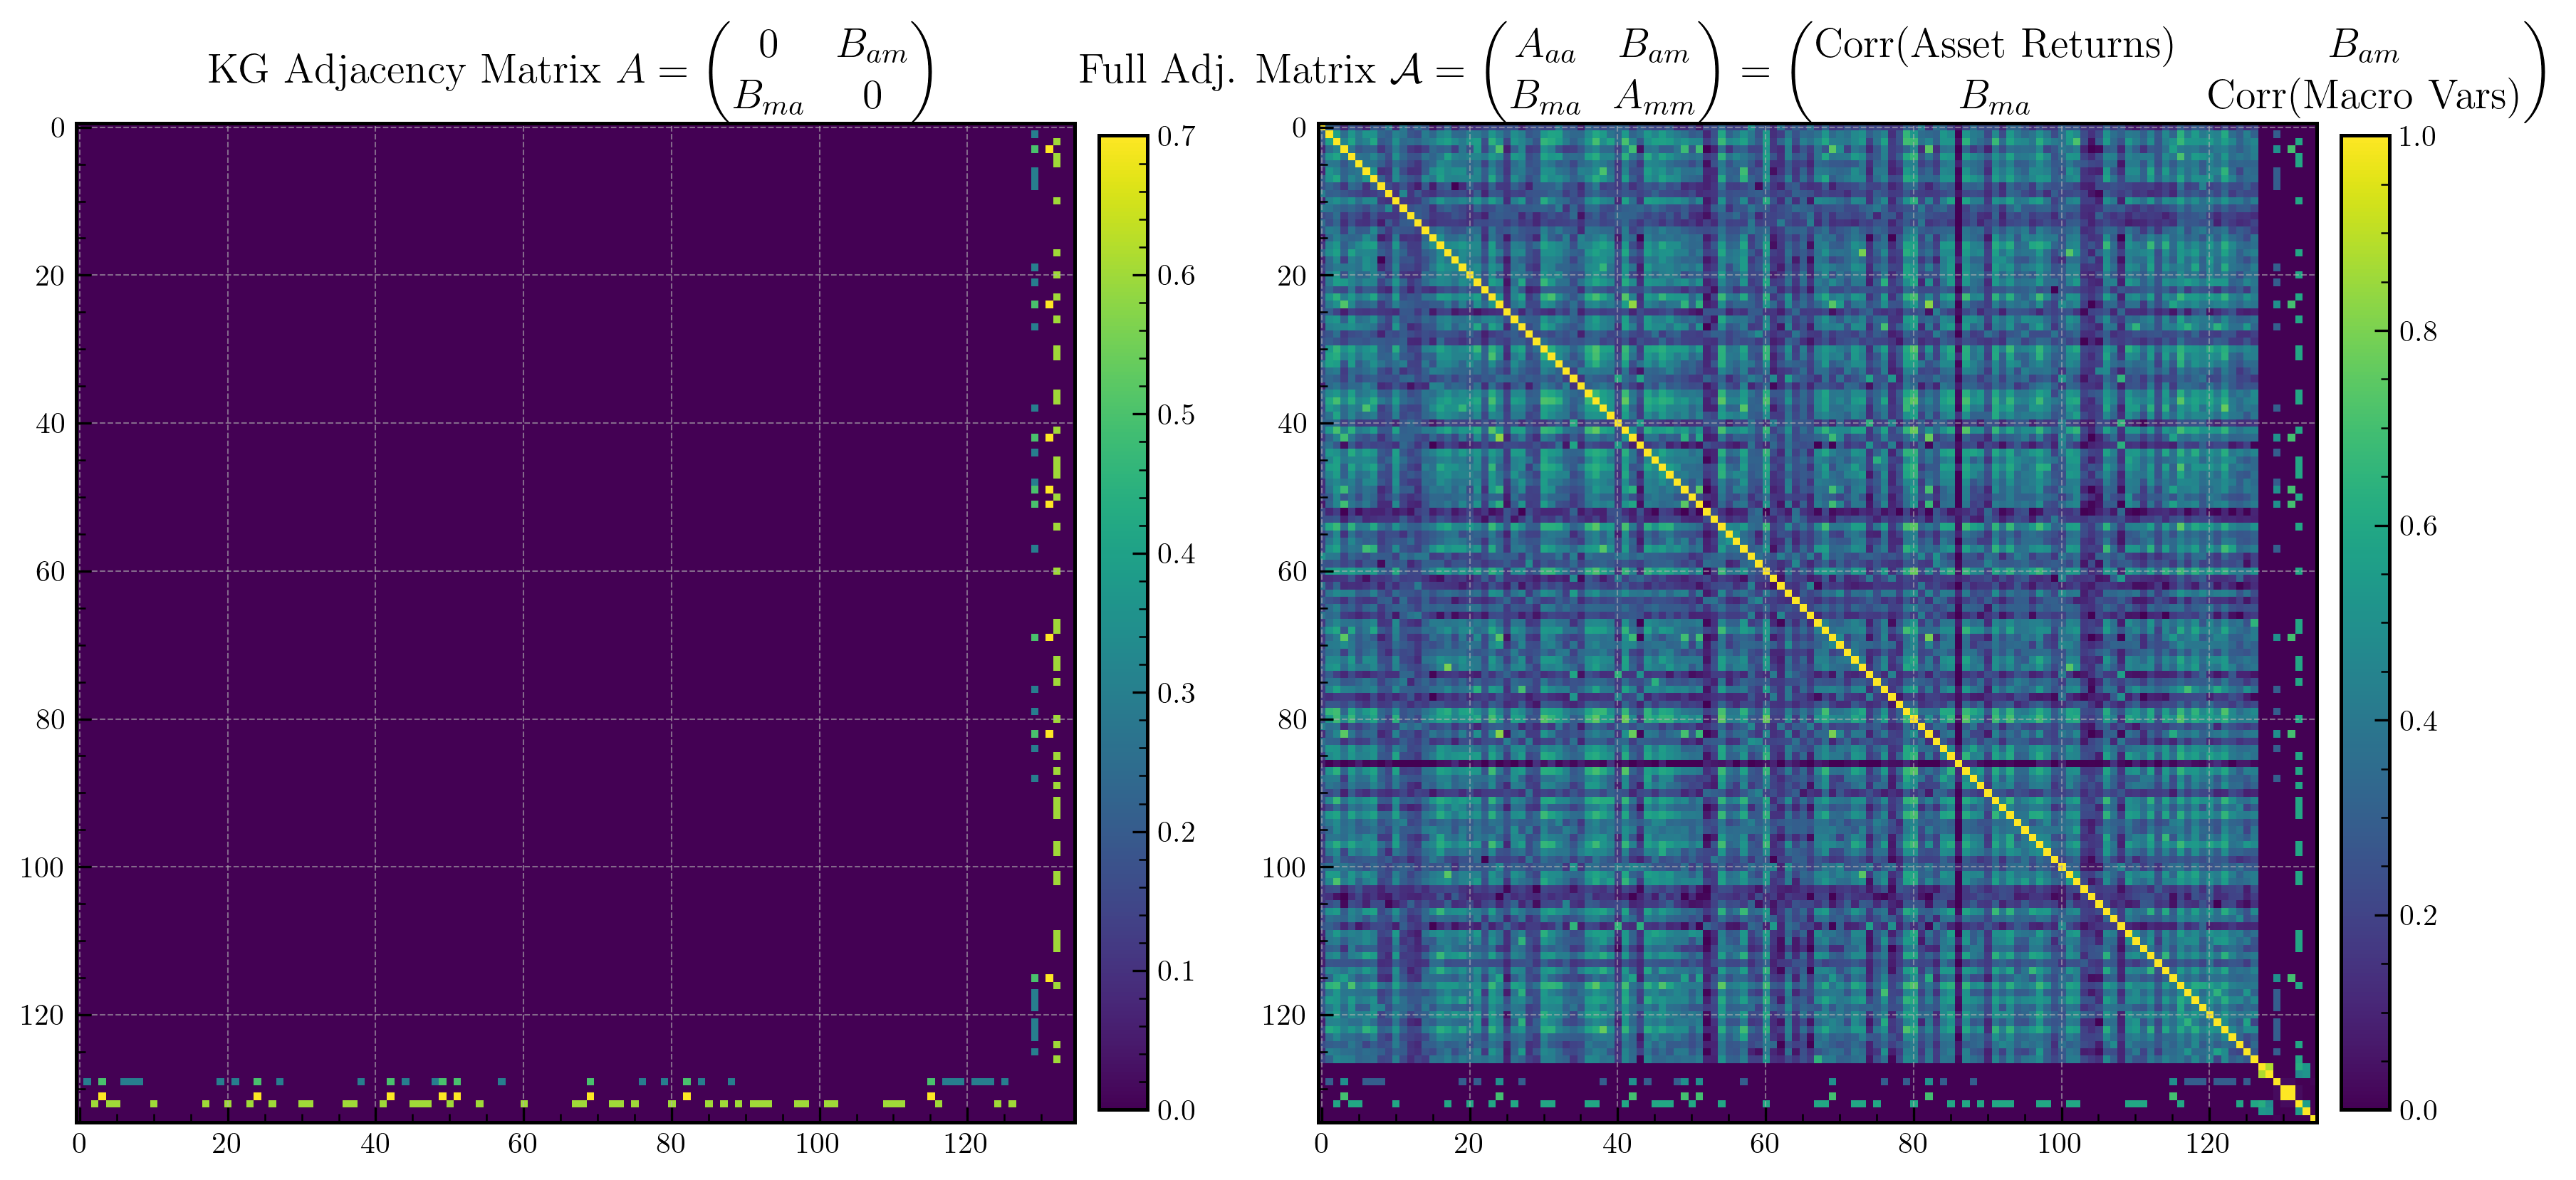

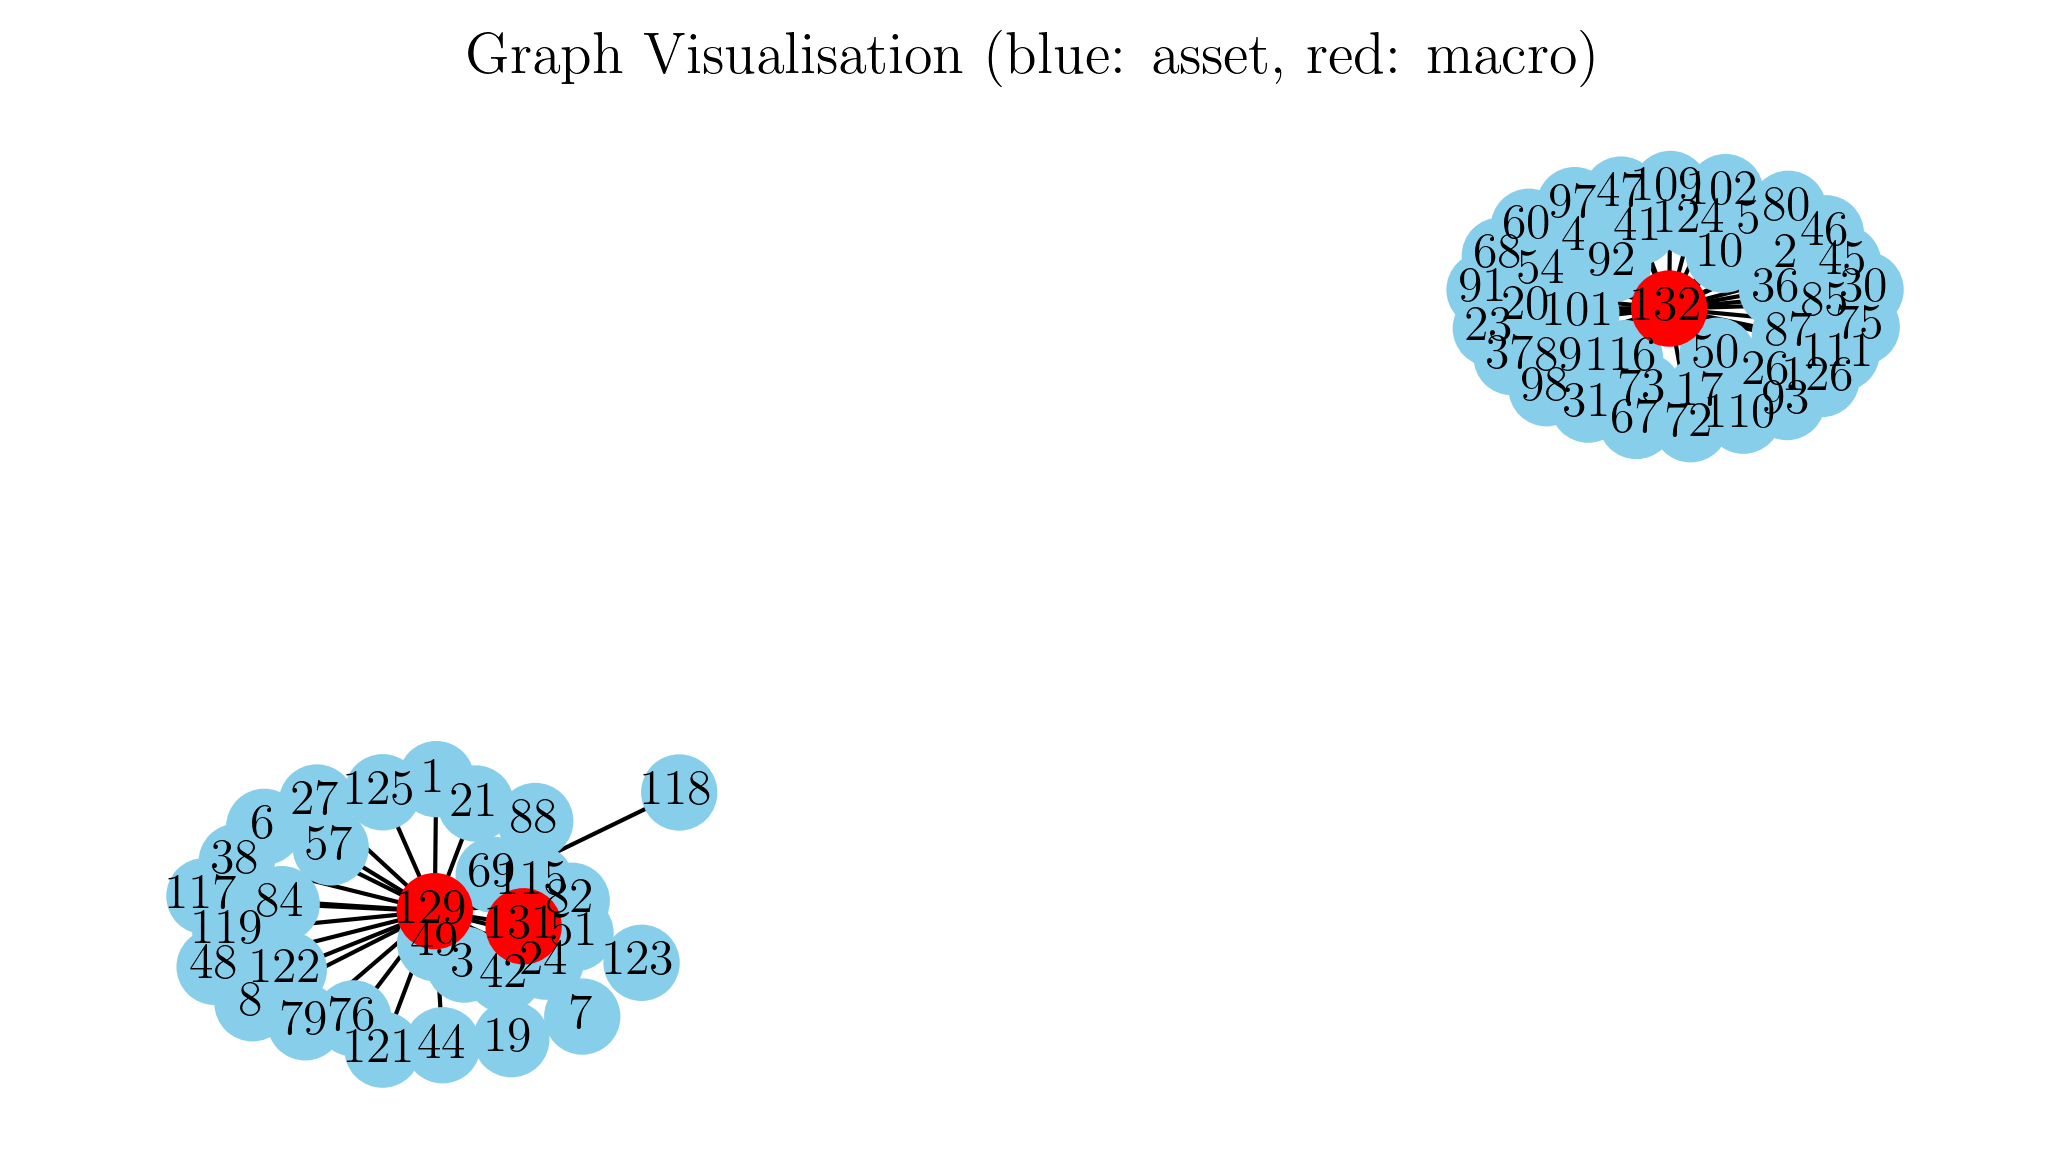

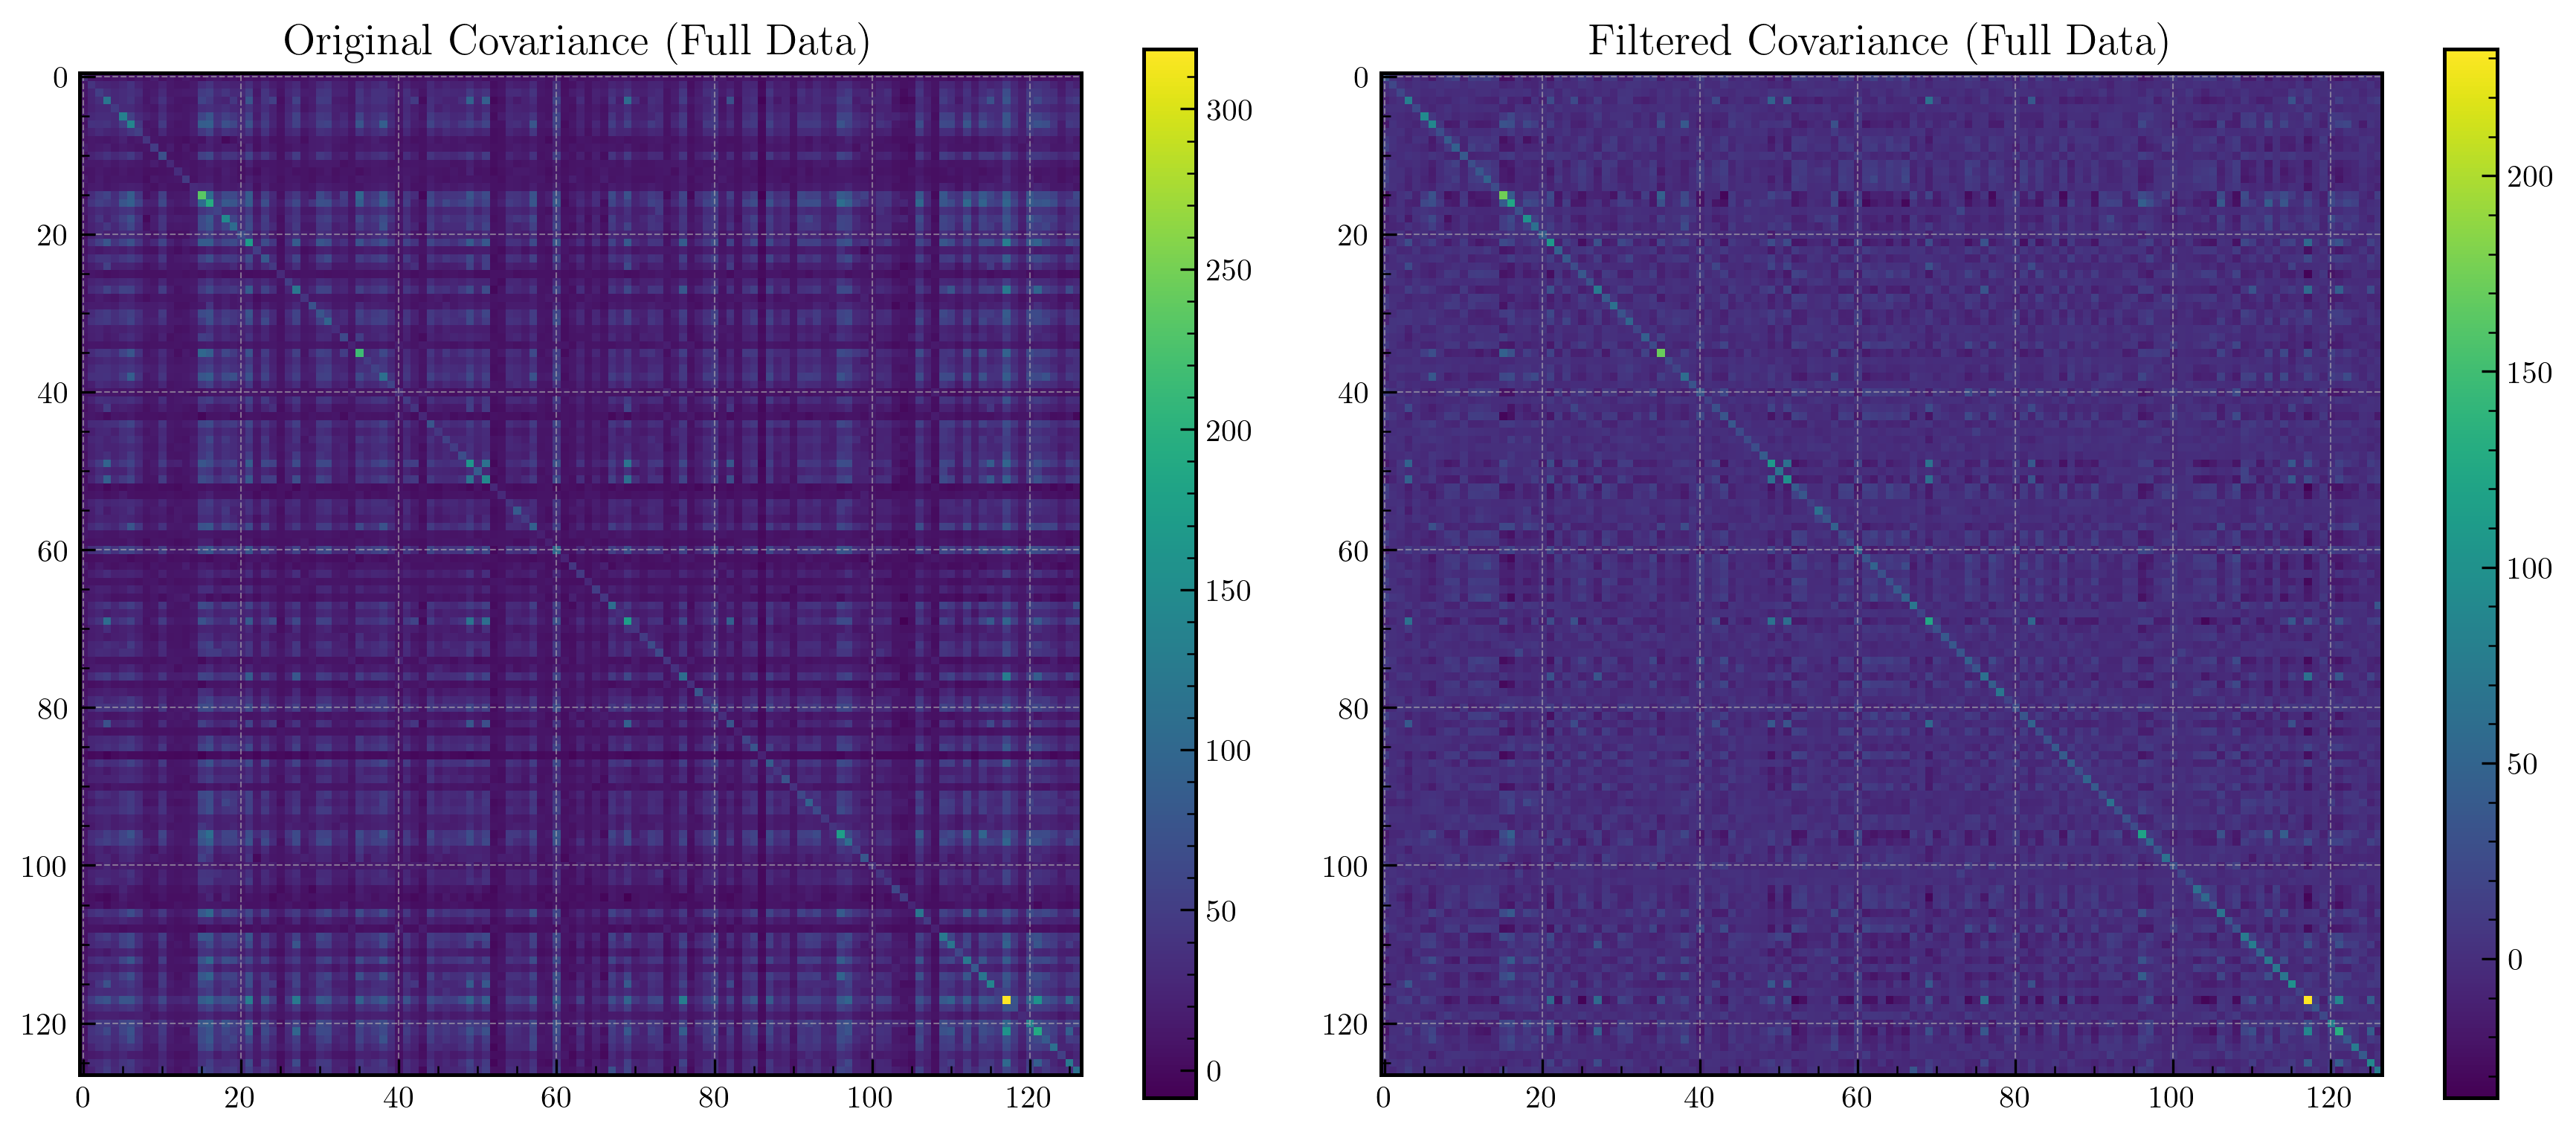

In [20]:

# Example sector -> macro weights
sector_macro_dict_example = {
    10.0: {"IR_10Y_GOV": 0.7, "CPI": 0.5},
    15.0: {"CPI": 0.3},
    20.0: {"T10Y3M": 0.6},
    # add more as desired
}

macro_cols = [
    "AAA10Y",
    "BAA10Y",
    "CPI",
    "GS10",
    "IR_10Y_GOV",
    "T10Y3M",
    "Unemployment",
    "WorkingAgePop",
]

# Build the KG adjacency matrix using your provided function.
A_kg, kg_labels = build_kg_adj_matrix(
    merged=merged, macro_cols=macro_cols, sector_macro_dict=sector_macro_dict_example
)

# Now instantiate the GraphFactorModel
model = GraphFactorModel(
    combined_df=combined_df, A_kg=A_kg, gamma=0.7, filter_type="high"
)
model.plot_adjacencies_graph()
model.plot_covariances()


Fitting to Entire Data as Training (without KG, high-pass filter)
Training MSE: 36.35348510823172
Directional Accuracy: 72.55%
Fitting to Entire Data as Training (with KG, high-pass filter)
Training MSE: 36.441309356386284
Directional Accuracy: 72.58%
Online Rolling-window Testing (without KG, high-pass filter)
MSE: 121.35507650301011
Directional Accuracy: 49.86%
Online Rolling-window Testing (with KG, high-pass filter)
MSE: 103.33074707168663
Directional Accuracy: 52.48%
Online Rolling-window Testing (with KG, low-pass filter)
MSE: 36089.99777480391
Directional Accuracy: 48.41%


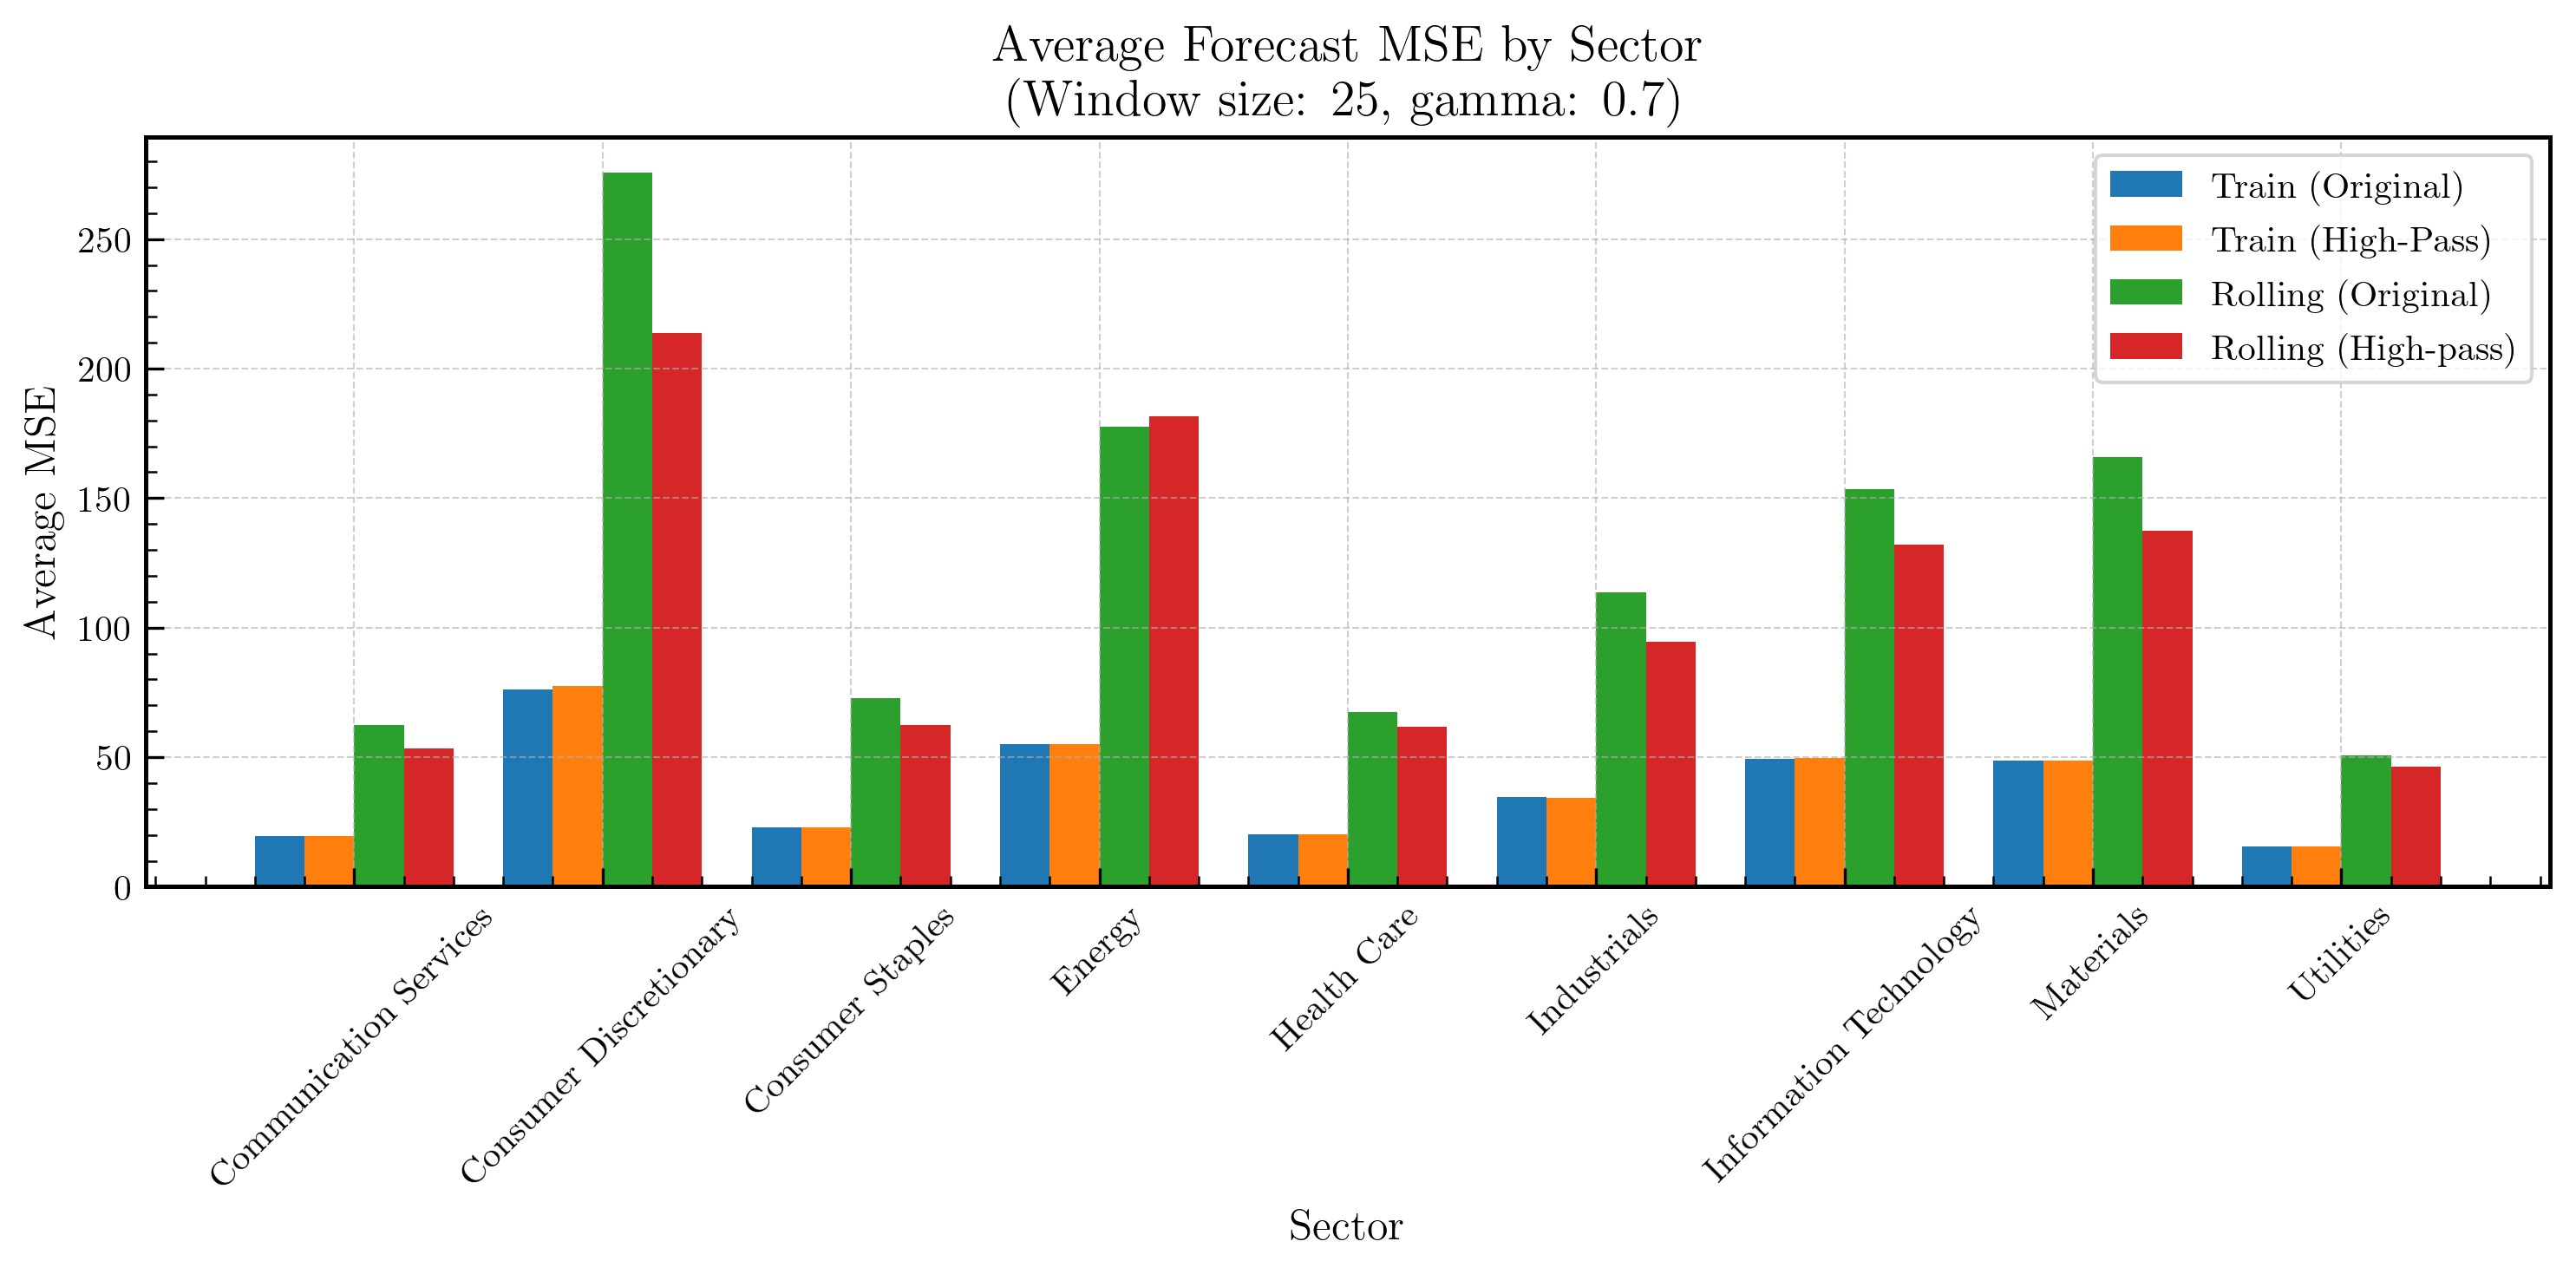

/var/folders/1f/rjjb6d_j1nx2wjjbspryf95r0000gn/T/ipykernel_66192/773742865.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sectors, rotation=45)


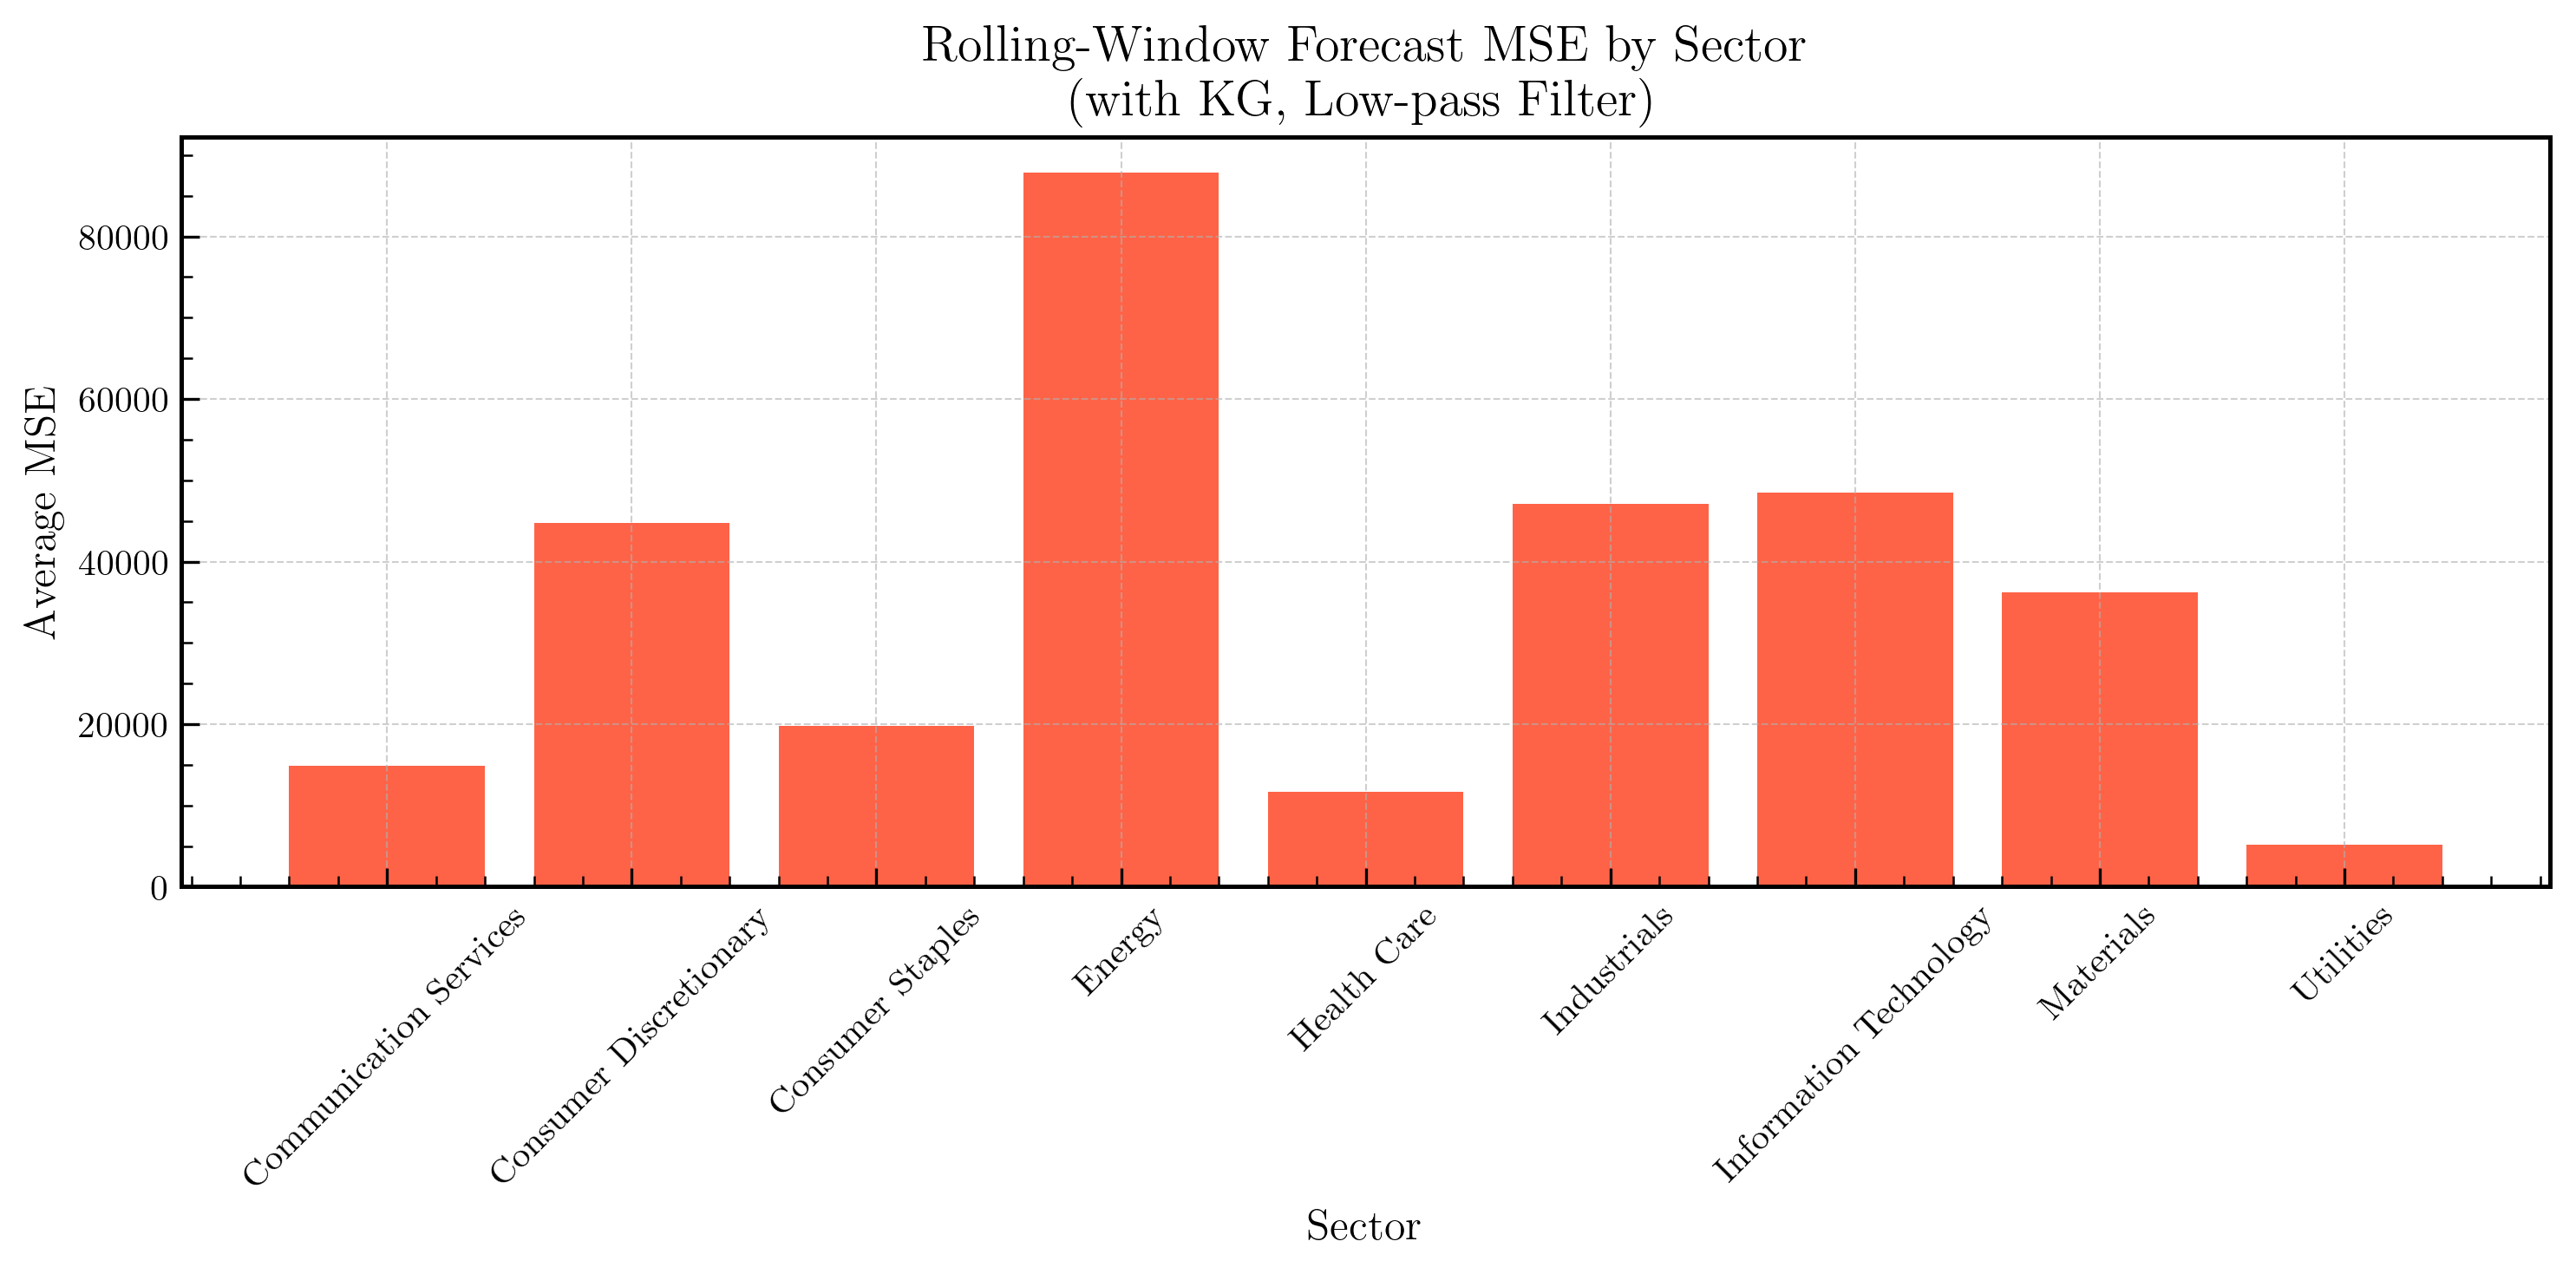

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Instantiate model with high-pass filtering
model = GraphFactorModel(
    combined_df=combined_df, A_kg=A_kg, gamma=0.7, filter_type="high"
)

# --- Experiment 1: Training MSE with original asset returns (without KG) ---
mse_train_orig, preds_train_orig, true_train_orig = model.fit_training(use_kg=False)

# --- Experiment 2: Training MSE with filtered asset returns (with KG) ---
mse_train_filt, preds_train_filt, true_train_filt = model.fit_training(use_kg=True)

# --- Experiment 3: Rolling-window forecast MSE with original asset returns (without KG) ---
mse_roll_orig, preds_roll_orig, true_roll_orig = model.predict_rolling(window_size=25, use_kg=False)

# --- Experiment 4: Rolling-window forecast MSE with filtered asset returns (with KG, high-pass) ---
mse_roll_filt, preds_roll_filt, true_roll_filt = model.predict_rolling(window_size=25, use_kg=True)

# --- Experiment 5: Experimental run: instantiate a new model with low-pass filtering ---
model = GraphFactorModel(
    combined_df=combined_df, A_kg=A_kg, gamma=0.7, filter_type="low"
)
mse_roll_filt_exp, preds_roll_filt_exp, true_roll_filt_exp = model.predict_rolling(window_size=25, use_kg=True)

# Helper to compute asset-wise MSE
def compute_asset_mse(preds, true_vals):
    return np.mean((true_vals - preds) ** 2, axis=0)

# Compute asset-wise MSEs
asset_mse_train_orig     = compute_asset_mse(preds_train_orig, true_train_orig)
asset_mse_train_filt     = compute_asset_mse(preds_train_filt, true_train_filt)
asset_mse_roll_orig      = compute_asset_mse(preds_roll_orig, true_roll_orig)
asset_mse_roll_filt_high = compute_asset_mse(preds_roll_filt, true_roll_filt)
asset_mse_roll_filt_low  = compute_asset_mse(preds_roll_filt_exp, true_roll_filt_exp)  # plotted separately

# Assemble sector-level DataFrame
mse_df = pd.DataFrame({
    'gvkey': merged['gvkey'],
    'Sector': merged['Sector'],
    'Train_Orig': asset_mse_train_orig,
    'Train_Filt': asset_mse_train_filt,
    'Roll_Orig': asset_mse_roll_orig,
    'Roll_Filt_High': asset_mse_roll_filt_high,
    'Roll_Filt_Low': asset_mse_roll_filt_low,
})

mse_df['Sector'] = mse_df['Sector'].str.replace('_', ' ')
sector_mse = mse_df.groupby('Sector').mean().reset_index()

# Grouped bar chart for the 4 normal cases
sectors = sector_mse['Sector']
x = np.arange(len(sectors))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - 1.5*width, sector_mse['Train_Orig'],     width, label='Train (Original)')
ax.bar(x - 0.5*width, sector_mse['Train_Filt'],     width, label='Train (High-Pass)')
ax.bar(x + 0.5*width, sector_mse['Roll_Orig'],      width, label='Rolling (Original)')
ax.bar(x + 1.5*width, sector_mse['Roll_Filt_High'], width, label='Rolling (High-pass)')

ax.set_xlabel('Sector')
ax.set_ylabel('Average MSE')
ax.set_title('Average Forecast MSE by Sector \n'
             '(Window size: 25, gamma: 0.7)')
ax.set_xticks(x)
ax.set_xticklabels(sectors, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# Separate plot for low-pass KG filtering (because it's huge)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(sectors, sector_mse['Roll_Filt_Low'], color='tomato')
ax.set_xlabel('Sector')
ax.set_ylabel('Average MSE')
ax.set_title('Rolling-Window Forecast MSE by Sector\n(with KG, Low-pass Filter)')
ax.set_xticklabels(sectors, rotation=45)
plt.tight_layout()
plt.show()